In [1]:
import json
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert

In [2]:
tao_frames_root_path = Path('/home/tri110414/nfs_home/datasets/TAO/frames')
with open('annotations/train.json') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['videos', 'annotations', 'tracks', 'images', 'info', 'categories', 'licenses'])

In [4]:
data["images"]

[{'id': 0,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa11',
  'width': 640,
  'height': 480,
  'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0391.jpg',
  'frame_index': 390,
  'license': 0,
  'video_id': 0},
 {'id': 1,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa11',
  'width': 640,
  'height': 480,
  'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0421.jpg',
  'frame_index': 420,
  'license': 0,
  'video_id': 0},
 {'id': 2,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa11',
  'width': 640,
  'height': 480,
  'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0451.jpg',
  'frame_index': 450,
  'license': 0,
  'video_id': 0},
 {'id': 3,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa

In [5]:
for cat in data['categories']:
    if cat['frequency'] == 'r':
        print(cat['name'], cat['instance_count'])

acorn 0
alligator 0
amplifier 0
apple_juice 0
applesauce 0
apricot 0
armoire 0
armor 1
ax 4
bagpipe 0
baguet 0
bait 0
ballet_skirt 0
Band_Aid 0
banjo 0
barbell 0
barge 0
bass_horn 0
bat_(animal) 0
batter_(food) 2
beachball 0
beaker 0
beeper 0
beetle 0
Bible 1
birdfeeder 5
birdbath 0
birthday_card 0
biscuit_(bread) 0
pirate_flag 0
blimp 0
boar 0
gameboard 2
bobby_pin 0
bolo_tie 0
bonnet 0
book_bag 9
bookmark 0
boom_microphone 1
bow_(weapon) 2
pipe_bowl 0
bowling_ball 7
bowling_pin 0
boxing_glove 0
brass_plaque 0
breechcloth 0
broach 1
bubble_gum 0
horse_buggy 4
bulldog 0
bulldozer 0
bulletproof_vest 0
corned_beef 0
burrito 2
cabana 0
cabin_car 3
locker 0
candelabrum 0
candy_bar 0
cannon 0
cantaloup 4
canteen 0
cape 1
elevator_car 0
car_battery 0
cardigan 0
cargo_ship 1
carnation 0
casserole 0
cassette 0
caviar 0
chain_mail 0
chaise_longue 0
champagne 0
chap 1
checkbook 0
checkerboard 1
chessboard 2
chest_of_drawers_(furniture) 1
chickpea 0
Chihuahua 0
chili_(vegetable) 0
chime 0
chinawa

In [52]:
data['categories'][804]

{'frequency': 'f',
 'id': 805,
 'synset': 'person.n.01',
 'image_count': 93,
 'instance_count': 487,
 'synonyms': ['baby',
  'child',
  'boy',
  'girl',
  'man',
  'woman',
  'person',
  'human'],
 'def': 'a human being',
 'name': 'baby'}

In [48]:
data['annotations'][1]

{'segmentation': [[156, 97, 306, 97, 306, 398, 156, 398]],
 'bbox': [156, 97, 150, 301],
 'area': 45150,
 'iscrowd': 0,
 'id': 1,
 'image_id': 0,
 'category_id': 805,
 'track_id': 1,
 '_scale_uuid': '82addabd-8991-49f8-b63e-e0e767d4e695',
 'scale_category': 'moving object',
 'video_id': 0}

In [45]:
data['annotations'][6]

{'segmentation': [[58, 63, 465, 63, 465, 480, 58, 480]],
 'bbox': [58, 63, 407, 417],
 'area': 169719,
 'iscrowd': 0,
 'id': 6,
 'image_id': 1,
 'category_id': 805,
 'track_id': 1,
 '_scale_uuid': '82addabd-8991-49f8-b63e-e0e767d4e695',
 'scale_category': 'moving object',
 'video_id': 0}

In [53]:
data['images'][0]

{'id': 0,
 'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
 '_scale_task_id': '5de800eddb2c18001a56aa11',
 'width': 640,
 'height': 480,
 'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0391.jpg',
 'frame_index': 390,
 'license': 0,
 'video_id': 0}

In [21]:
data['categories'][804]

{'frequency': 'f',
 'id': 805,
 'synset': 'person.n.01',
 'image_count': 93,
 'instance_count': 487,
 'synonyms': ['baby',
  'child',
  'boy',
  'girl',
  'man',
  'woman',
  'person',
  'human'],
 'def': 'a human being',
 'name': 'baby'}

In [56]:
for i, d in enumerate(data["categories"]):
    searched_class = 'bin'
    if (d["name"] == searched_class) or (searched_class in d["synonyms"]):
        print(d["name"],'id:', d["id"], 'index:', i)
        print(d)

In [45]:
labels

['car_(automobile)']

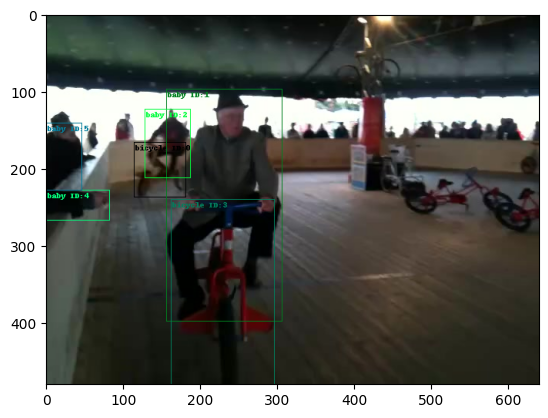

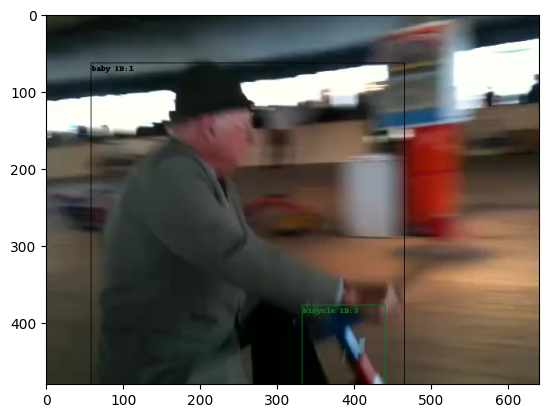

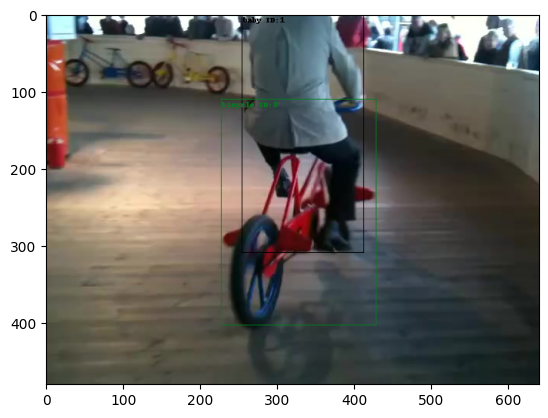

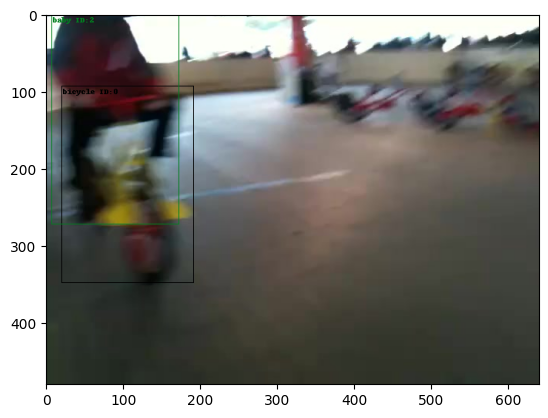

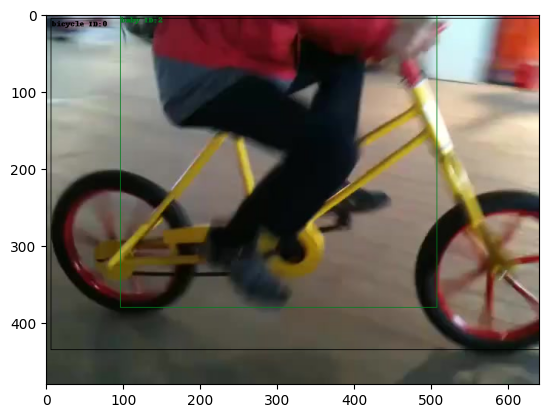

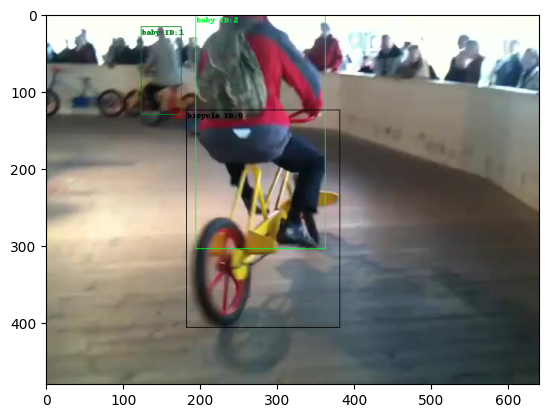

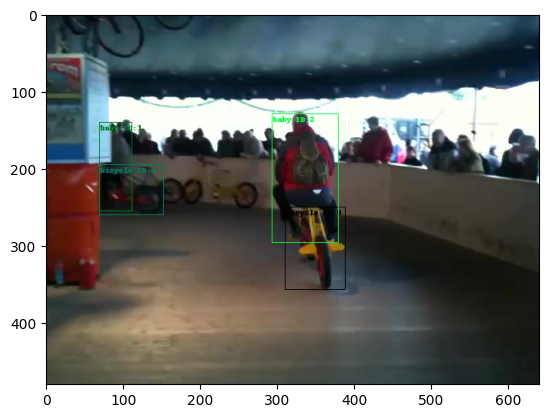

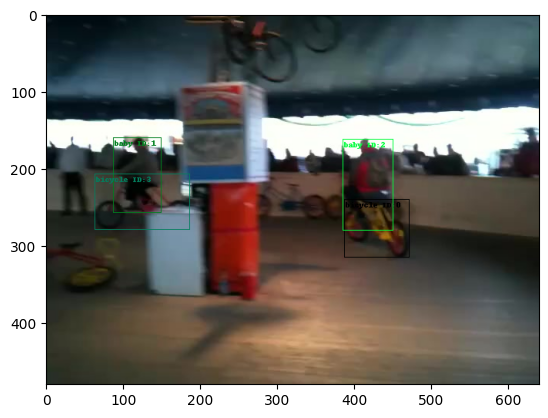

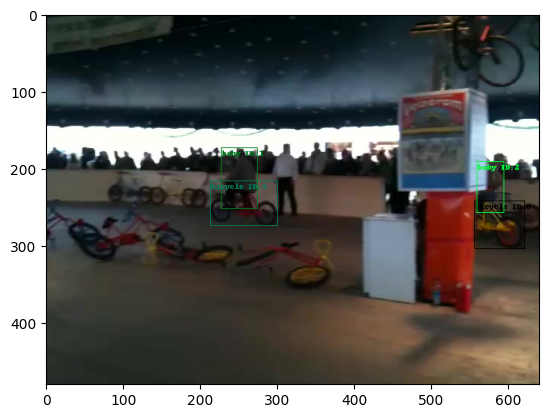

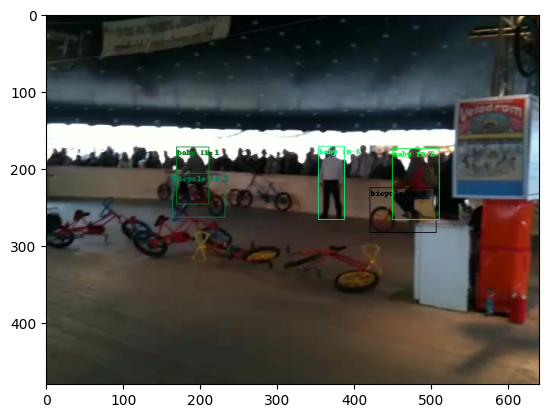

In [60]:
init_i = 0
for i in range(10):
    i = init_i + i
    im = Image.open(tao_frames_root_path / data['images'][i]['file_name'])
    boxes = torch.tensor([a['bbox'] for a in data['annotations'] if a['image_id'] == data['images'][i]['id']])
    boxes = box_convert(boxes, in_fmt='xywh', out_fmt='xyxy')
    labels = [(a['category_id'], a['track_id']) for a in data['annotations'] if a['image_id'] == data['images'][i]['id']]
    labels = [data['categories'][n-1]['name'] + f' ID:{tr_id}' for n, tr_id in labels]
    im = draw_bounding_boxes(torch.tensor(np.array(im).transpose(2, 0, 1)), boxes, labels)
    plt.imshow(im.permute(1, 2, 0))
    plt.show()

In [92]:
boxes = [data['annotations'][n]['bbox'] for n in range(4)]
labels = [data['annotations'][n]['category_id'] for n in range(4)]
boxes = box_convert(torch.tensor(boxes), 'xywh', 'xyxy')
# ids to labels
labels = [data['categories'][n-1]['name'] for n in labels]

In [93]:
labels

['bicycle', 'baby', 'baby', 'bicycle']

In [94]:
# Transform img to tensor
img = torch.tensor(np.array(im).transpose(2, 0, 1))
img = draw_bounding_boxes(img, boxes, labels)

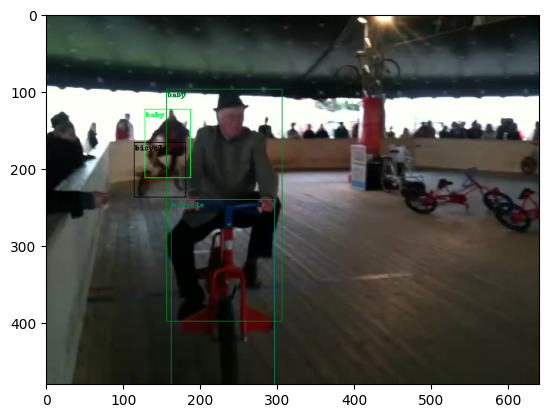

In [95]:
plt.imshow(img.permute(1, 2, 0))